In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [2]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

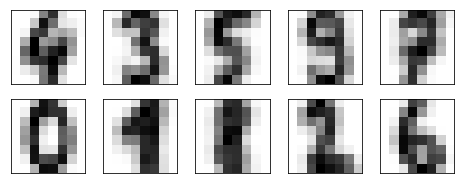

In [3]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [4]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

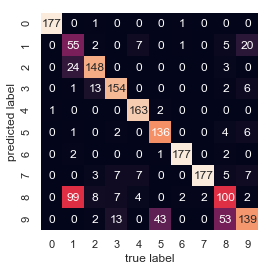

In [6]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [7]:
from sklearn.preprocessing import scale

In [8]:
digits.data.shape

(1797, 64)

In [9]:
from sklearn.decomposition import PCA
n_samples, n_features = digits.data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target
h = .02
reduced_data = PCA(n_components=2).fit_transform(digits.data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
clusters = kmeans.fit_predict(reduced_data)

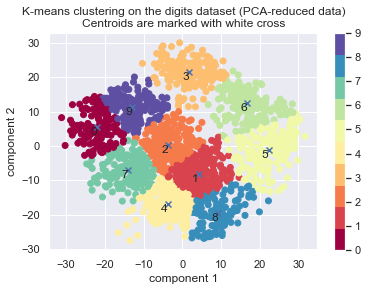

In [10]:
centroids = kmeans.cluster_centers_
plt_data = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar()
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x')
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlabel('component 1')
plt.ylabel('component 2')
labels = ['{0}'.format(i) for i in range(10)]
for i in range (10):
    xy=(centroids[i, 0],centroids[i, 1])
    plt.annotate(labels[i],xy, horizontalalignment='right', verticalalignment='top')
plt.show()

In [11]:
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [12]:
accuracy_score(digits.target, labels)

0.6082359488035615

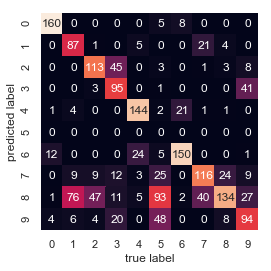

In [13]:
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');